In [1]:
data_path = "../input/credit-card-customers/BankChurners.csv"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv(data_path, index_col='CLIENTNUM').iloc[:, :-2]
data.columns = list(map(lambda col: col.lower(), data.columns)) # easier to work with
data.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  

In [5]:
data.describe()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


the data contains both numeric and categorical columns. missing values don't exist in any columns. however, the range of data differ for which we might need to do feature scaling before model training to not let features with large value dominate features with small values.

In [6]:
attrited = data[data['attrition_flag'] == 'Attrited Customer']

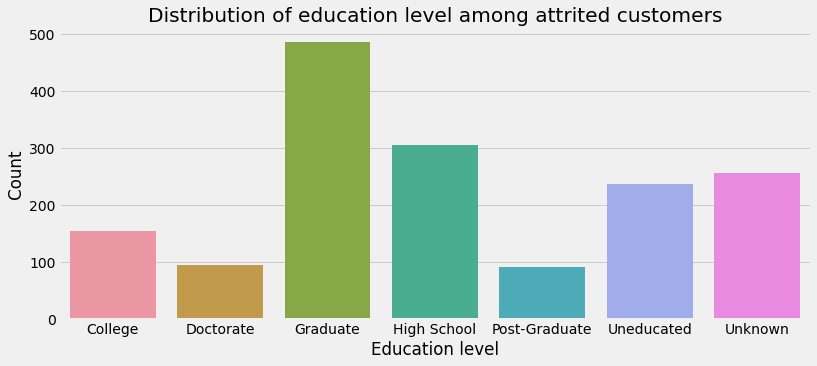

In [7]:
group = attrited.groupby(['education_level'], as_index=False).size()

fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(x='education_level', y='size', data=group)

ax.set_ylabel('Count')
ax.set_xlabel('Education level')
ax.set_title('Distribution of education level among attrited customers')

plt.show()

majority of attrited customers have graduate level followed by high school level education, minority of them have post-graduate or higher degree.

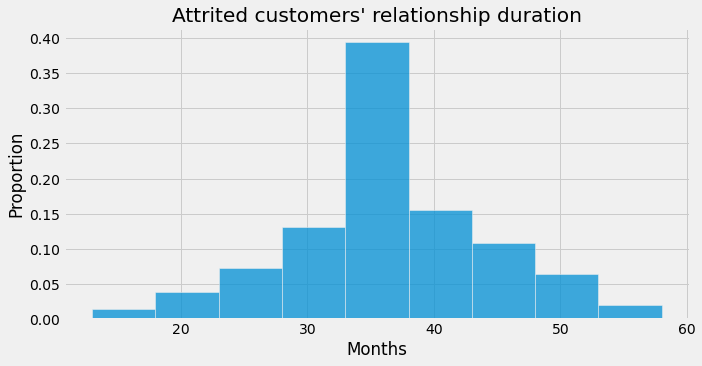

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(attrited['months_on_book'], stat='proportion', binwidth=5)
ax.set_ylabel('Proportion')
ax.set_xlabel('Months')
ax.set_title('Attrited customers\' relationship duration')
plt.show()

from the histogram we could notice that most of the attrited clients have maintained duration of their relationship with bank for around three years

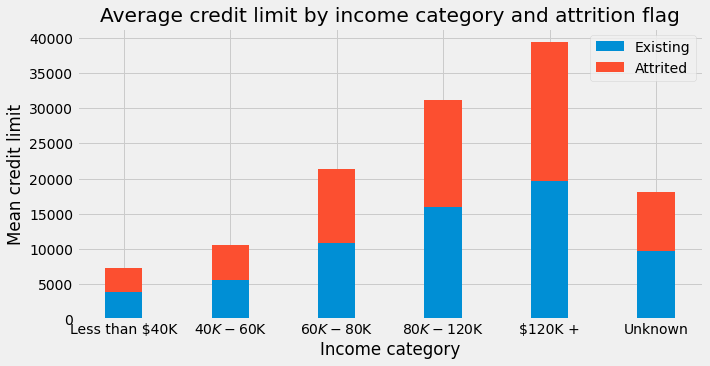

In [9]:
group = data.groupby(['income_category', 'attrition_flag'], as_index=False)['credit_limit'].mean()

labels = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

key_dict = {v:k for k,v in enumerate(labels)}
sort_key_func = lambda x: x.map(key_dict)

existing = group[group['attrition_flag'] == 'Existing Customer'].sort_values('income_category', key=sort_key_func)['credit_limit']
attri = group[group['attrition_flag'] == 'Attrited Customer'].sort_values('income_category', key=sort_key_func)['credit_limit']

width = 0.35  

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(labels, existing, width, label='Existing')
ax.bar(labels, attri, width, bottom=existing,
       label='Attrited')

ax.set_ylabel('Mean credit limit')
ax.set_xlabel('Income category')
ax.set_title('Average credit limit by income category and attrition flag')
ax.legend()

plt.show()

on average, existing customers in all income categories have higer credit limit than attrited customers except for 120K+ dollars category in which attrited customers have slightly higer average credit limit

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


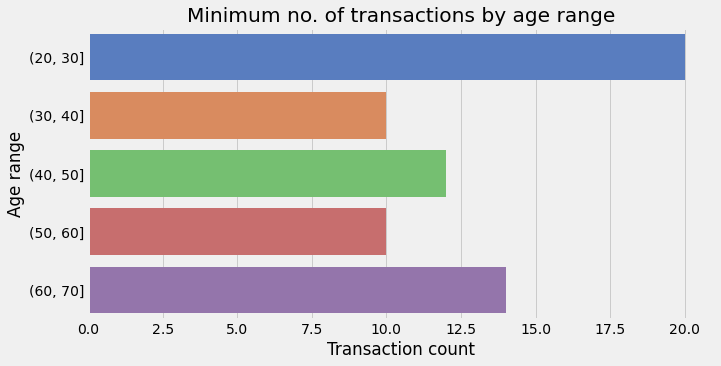

In [10]:
age_data = attrited[['customer_age', 'total_trans_ct']]
age_data['age_range'] = pd.cut(age_data['customer_age'], bins=np.arange(10, 110, 10)).astype(str)
group = age_data.groupby('age_range', as_index=False)['total_trans_ct'].min()
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y='age_range', x='total_trans_ct', data=group, orient='h', palette='muted')
ax.set_ylabel('Age range')
ax.set_xlabel('Transaction count')
ax.set_title('Minimum no. of transactions by age range')
plt.show()

according to the data, in the past year among the attrited customers, a young adult customer has done transactions with the bank not less than 20 times. similarly, elderly customers have second highest minimum no. of transactions done with the bank

In [11]:
copy = data.select_dtypes(exclude=['object']).copy()
copy.head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
CLIENTNUM,,,,,,,,,,,,,,
768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
label_map = {v:k for k,v in enumerate(data['attrition_flag'].unique())}
copy['attrition_flag'] = data['attrition_flag'].apply(lambda x: label_map[x])

In [13]:
gdb = GradientBoostingClassifier()
gdb.fit(copy.iloc[:, :-1], copy.iloc[:, -1])

GradientBoostingClassifier()

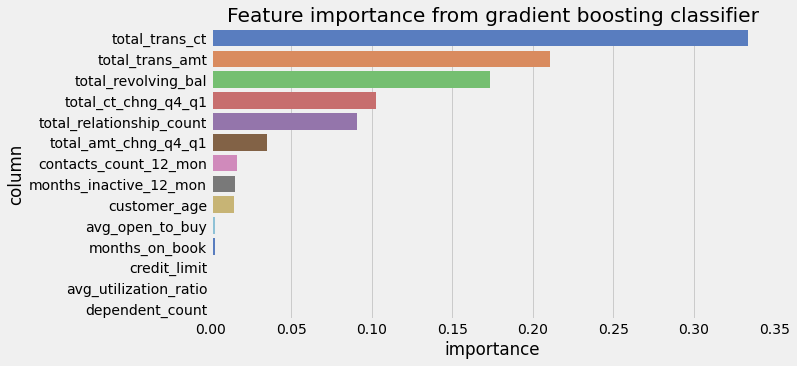

In [14]:
importances = pd.DataFrame({'importance': gdb.feature_importances_, 'column': copy.iloc[0:1, :-1].columns}).sort_values('importance', ascending=False)
plt.figure(figsize=(9,5))
sns.barplot(y='column', x='importance', data=importances, palette='muted')
plt.title('Feature importance from gradient boosting classifier')
plt.show()

In [15]:
imp_feat = importances.head(6).column.values
imp_feat

array(['total_trans_ct', 'total_trans_amt', 'total_revolving_bal',
       'total_ct_chng_q4_q1', 'total_relationship_count',
       'total_amt_chng_q4_q1'], dtype=object)

In [16]:
to_use = data[imp_feat].copy()

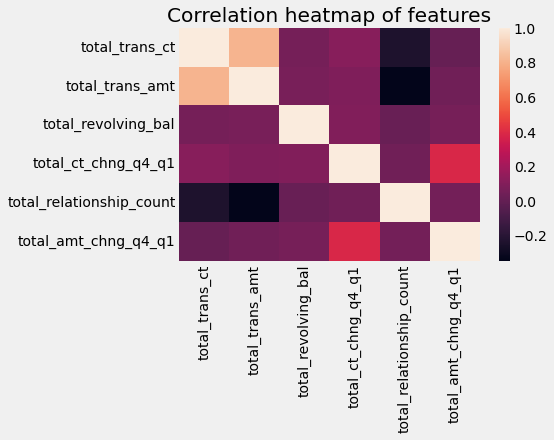

In [17]:
corr = to_use.corr()
plt.figure(figsize=(6,4))
plt.title('Correlation heatmap of features')
sns.heatmap(corr)
plt.show()

some features are highly to moderately positively correlated, we could consider dropping some of them as no additional information is added by having all of them

In [18]:
to_use = to_use.drop(columns=['total_trans_ct', 'total_ct_chng_q4_q1'])
log_train = np.log1p(to_use)

std = StandardScaler()
std_train = std.fit_transform(log_train)

max_abs = MaxAbsScaler()
abs_train = max_abs.fit_transform(log_train)

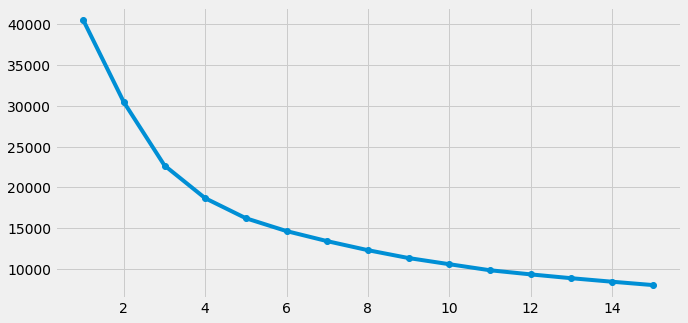

In [19]:
inertia_std = []
for k in range(1, 16):
    kmean_std = KMeans(n_clusters=k, random_state=42)
    kmean_std.fit(std_train)
    inertia_std.append(kmean_std.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1, 16), inertia_std, marker='o')
plt.show()

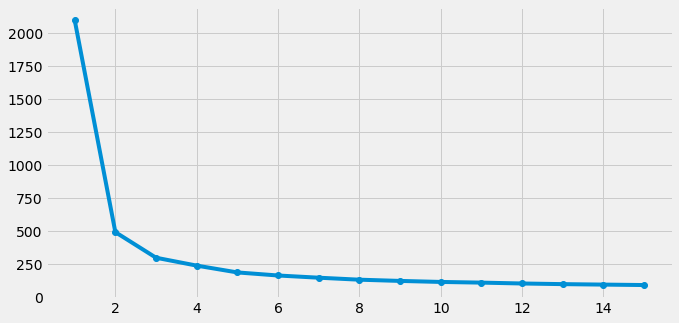

In [20]:
inertia_abs = []
for k in range(1, 16):
    kmean_abs = KMeans(n_clusters=k, random_state=42)
    kmean_abs.fit(abs_train)
    inertia_abs.append(kmean_abs.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 16), inertia_abs, marker='o')
plt.show()

In [21]:
kmean_abs = KMeans(n_clusters=2, random_state=42)
kmean_abs.fit(abs_train)
kmean_abs.inertia_

493.5911790832773

In [22]:
kmean_abs.cluster_centers_

array([[8.33240589e-01, 9.27385573e-01, 7.78402235e-01, 3.79864758e-01],
       [8.24398851e-01, 8.32667268e-15, 7.67771237e-01, 3.67650943e-01]])

In [23]:
kmean_labels = pd.Series(kmean_abs.predict(abs_train), index=data.index)
kmean_labels

CLIENTNUM
768805383    0
818770008    0
713982108    1
769911858    0
709106358    1
            ..
772366833    0
710638233    0
716506083    1
717406983    1
714337233    0
Length: 10127, dtype: int32

In [24]:
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_labels = pd.Series(agg.fit_predict(abs_train), index=data.index)
agg_labels

CLIENTNUM
768805383    0
818770008    0
713982108    1
769911858    0
709106358    1
            ..
772366833    0
710638233    0
716506083    1
717406983    1
714337233    0
Length: 10127, dtype: int64

In [25]:
dbs = DBSCAN(eps=0.22)
dbs_labels = pd.Series(dbs.fit_predict(abs_train), index=data.index)
dbs_labels

CLIENTNUM
768805383    0
818770008    0
713982108    1
769911858    0
709106358    1
            ..
772366833    0
710638233    0
716506083    1
717406983    1
714337233    0
Length: 10127, dtype: int64

In [26]:
print('silhouette score for kmeans clustering:', silhouette_score(abs_train, kmean_labels))
print('silhouette score for agglomorative clustering:', silhouette_score(abs_train, agg_labels))
print('silhouette score for dbscan clustering:', silhouette_score(abs_train, dbs_labels))

silhouette score for kmeans clustering: 0.7189685259045624
silhouette score for agglomorative clustering: 0.7189685259045624
silhouette score for dbscan clustering: 0.7189685259045624


we could notice that the clustering algorithms have given similar clusters even the algorithm that does not require specifying no. of clusters in advance

In [27]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(abs_train)

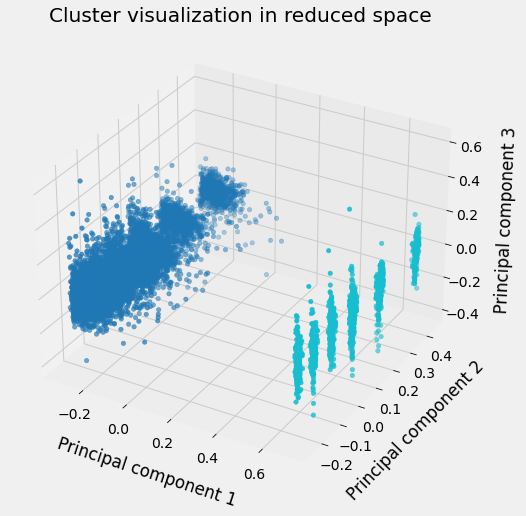

In [28]:
ax = plt.axes(projection='3d')
ax.scatter(reduced[:,0], reduced[:,1], reduced[:,2], c=dbs_labels, cmap='tab10')
ax.figure.set_figwidth(12)
ax.figure.set_figheight(8)
plt.title('Cluster visualization in reduced space')
ax.set_xlabel('Principal component 1', labelpad=15)
ax.set_ylabel('Principal component 2', labelpad=15)
ax.set_zlabel('Principal component 3', labelpad=15)
plt.show()